In [2]:
from nptdms import TdmsFile as TF
import sys, os
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [1]:
import mhdpy

ModuleNotFoundError: No module named 'mhdpy'

In [3]:
def create_tcdict(filepaths, loadfn, prefix = None ):
    """takes in a list of files and a load function, and creates a dict of a df for each file. If a prefix is passed, that is removed from the filename (typically the instrument name so only the test case is left as the dict key)"""

    dfs = {}

    for filepath in filepaths:
        filename = os.path.split(filepath)[1]
        testcase = os.path.splitext(filename)[0]

        if prefix != None:
            testcase = _remove_prefix(testcase,prefix)

        df =  loadfn(filepath)
        dfs[testcase] =df
    
    return dfs

In [4]:
def ocop2df(filepath,):
    file = TF(filepath)
    df = file.object(file.groups()[2]).as_dataframe()
    df.index = file.object('Global', "Wavelength").data
    indexarr = list(zip(*[file.object('Global', 'MP Pos').data,file.object('Global', 'Time').data]))
    df.columns = pd.MultiIndex.from_tuples(indexarr, names = ['MP','Wavelength'])
    print(filepath)
    return df

In [5]:
T = [1039, 1050, 1145, 1180, 1200]
Spcm = ['Flame', 'NIRQuest512']
names = []
filenames = []
path = 'Z:\\Test Data\\Raw Data\\Materials Testing\\2018-10-15\\UnspecifiedProj\\Measure\\'
for t in T:
    for s in Spcm:
        names.append(s+'_'+str(t)+'C')
        filenames.append((path+s+'_'+str(t)+'C.tdms'))

In [6]:
dfs = create_tcdict(filenames, ocop2df)

C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\nptdms\tdms.py:772: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  for ch in self.tdms_file.group_channels(self.group)])


Z:\Test Data\Raw Data\Materials Testing\2018-10-15\UnspecifiedProj\Measure\Flame_1039C.tdms
Z:\Test Data\Raw Data\Materials Testing\2018-10-15\UnspecifiedProj\Measure\NIRQuest512_1039C.tdms
Z:\Test Data\Raw Data\Materials Testing\2018-10-15\UnspecifiedProj\Measure\Flame_1050C.tdms
Z:\Test Data\Raw Data\Materials Testing\2018-10-15\UnspecifiedProj\Measure\NIRQuest512_1050C.tdms
Z:\Test Data\Raw Data\Materials Testing\2018-10-15\UnspecifiedProj\Measure\Flame_1145C.tdms
Z:\Test Data\Raw Data\Materials Testing\2018-10-15\UnspecifiedProj\Measure\NIRQuest512_1145C.tdms
Z:\Test Data\Raw Data\Materials Testing\2018-10-15\UnspecifiedProj\Measure\Flame_1180C.tdms
Z:\Test Data\Raw Data\Materials Testing\2018-10-15\UnspecifiedProj\Measure\NIRQuest512_1180C.tdms
Z:\Test Data\Raw Data\Materials Testing\2018-10-15\UnspecifiedProj\Measure\Flame_1200C.tdms
Z:\Test Data\Raw Data\Materials Testing\2018-10-15\UnspecifiedProj\Measure\NIRQuest512_1200C.tdms


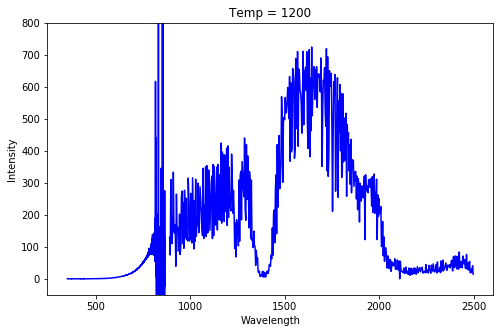

In [7]:
image = plt.figure(figsize=(8,5))
for temp in T:
    image.clear()
    plt.plot(dfs[Spcm[0]+'_'+str(temp)+'C'][0].mean(axis=1), c='b')
    plt.plot(dfs[Spcm[1]+'_'+str(temp)+'C'][1].mean(axis=1), c='b')
    plt.title('Temp = ' + str(temp))
    plt.ylabel('Intensity')
    plt.xlabel('Wavelength')
    plt.ylim(-50,800)
    image.savefig('MgO Black Body Curve T='+str(temp))

In [8]:
def twocolortemp(wl1,wl2,s):
    c2 = 14394264.78261
    wi1 = np.where(np.abs(s.index - wl1)<3.28)[0][0]
    wi2 = np.where(np.abs(s.index - wl2)<3.28)[0][0]
    e1 = np.mean(s.iloc[wi1-5:wi1+5])
    e2 = np.mean(s.iloc[wi2-5:wi2+5])
    num = c2*((1/wl1)-(1/wl2))
    den = -np.log(e1*wl1**5)+np.log(e2*wl2**5)
    #return e2
    return num/den

[nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan]
[-2450.89202242011, -2704.404507065443, -2365.336765905034, -2376.22487291266, -2137.981654134507]


C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encount

[nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan]
[-4810.210634588567, -4640.516199869746, -4036.5937857776207, -3531.171421795587, -3884.3268576935484]
[nan, nan, nan, nan, nan]


C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encount

[nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan]


C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encount

[nan, nan, nan, nan, nan]


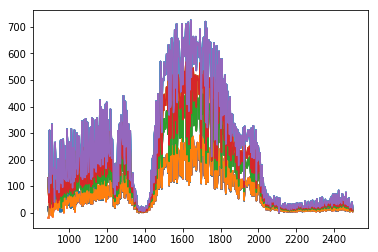

In [58]:
w=np.arange(900,1550,50)
bbt = []
for i, wa in enumerate(w):
    wb = wa+150
    BBT = []
    for temp in T:
        s = dfs[Spcm[1]+'_'+str(temp)+'C'][1].mean(axis=1)
        BBT.append(twocolortemp(wa,wb,s))
        plt.plot(s)
    print(BBT)
    bbt.append(BBT)
#plt.plot(df.columns, T, label='PostMeas')
#plt.plot(, Trt['Color Temp 1-2'])
#plt.plot(Trt2['Time'], Trt2['Temp'+str(wa)+'-'+str(wb)], label='RealTime')
#plt.ylim(-100,3000)
#plt.xlim(8000,10000)
#plt.legend()

[1301.5103126151698, 1222.676298065467, 1156.4678232351928, 1153.5903959017865, 1086.7896123731941, 1046.007295991578, 1002.0547222630545]
[1308.661351646701, 1198.426015849895, 1153.1877068567567, 1138.5289328255608, 1083.3818582737886, 1087.1633543269593, 1032.7091664695638]
[1340.6624540779108, 1301.224722425535, 1258.1352481390734, 1210.1320021253603, 1161.480990660288, 1120.9565928624634, 1097.1800582864403]
[1372.124828755576, 1324.1983056724741, 1296.405717896195, 1240.2441187786753, 1182.2723106537812, 1143.4359183072017, 1117.5631646122433]
[1359.2702036576693, 1322.8657131358523, 1287.1923105124824, 1234.7758306903509, 1179.5133818379702, 1157.5491601832728, 1121.1851940695126]


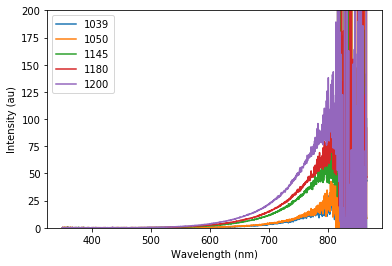

In [56]:
wl = [600,620,640,660,680,700,720,]#740#760,780]
dwl = 80
tt = []

for temp in T:
    t = []
    for wla in wl:
        wlb = wla+dwl
        s = dfs[Spcm[0]+'_'+str(temp)+'C'][0].mean(axis=1)
        t.append(twocolortemp(wla, wlb,s))
    plt.plot(s, label = str(temp))
    plt.ylim(0,200)
    print(t)
    tt.append(t)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (au)')
plt.legend()

In [51]:
bbs = pd.DataFrame(tt)
bbs.columns = wl
bbs.index= T

In [54]:
bbs.index.name = 'Measured T'
bbs.columns.name = 'Lower Wavelength (dl=80)'

In [55]:
bbs

Lower Wavelength (dl=80),600,620,640,660,680,700,720
Measured T,,,,,,,
1039,1301.510313,1222.676298,1156.467823,1153.590396,1086.789612,1046.007296,1002.054722
1050,1308.661352,1198.426016,1153.187707,1138.528933,1083.381858,1087.163354,1032.709166
1145,1340.662454,1301.224722,1258.135248,1210.132002,1161.480991,1120.956593,1097.180058
1180,1372.124829,1324.198306,1296.405718,1240.244119,1182.272311,1143.435918,1117.563165
1200,1359.270204,1322.865713,1287.192311,1234.775831,1179.513382,1157.549160,1121.185194


In [69]:
T

[1039, 1050, 1145, 1180, 1200]

In [44]:
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])